# Supervised learning with scikit-learn

### Binary classification

In the video, you saw that there are two types of supervised learning — classification and regression. Recall that binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

A dataset, churn_df, has been preloaded for you in the console.

Your task is to examine the data and choose which column could be the target variable for binary classification.

#### Possible Answers

    
- "customer_service_calls" ❌
    
    
- "total_night_charge" ❌
  
  
- "churn"  ✔
  
  
- "account_length" ❌



### The supervised learning workflow

Recall that scikit-learn offers a repeatable workflow for using supervised learning models to predict the target variable values when presented with new data.

Reorder the pseudo-code provided so it accurately represents the workflow of building a supervised learning model and making predictions.


#### Instructions


- Drag the code blocks into the correct order to represent how a supervised learning workflow would be executed.




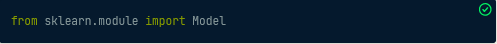


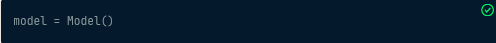

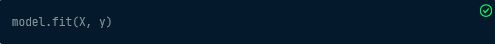

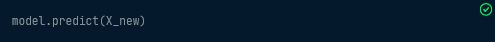

### k-Nearest Neighbors: Fit

In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

numpy has also been preloaded for you as np.


#### Instructions


- Import KNeighborsClassifier from sklearn.neighbors.
  
  
- Create an array called X containing values from the "account_length" and "customer_service_calls" columns, and an array called y for the values of the "churn" column.
  
  
- Instantiate a KNeighborsClassifier called knn with 6 neighbors.
  
  
- Fit the classifier to the data using the .fit() method.



In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

### k-Nearest Neighbors: Predict

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:


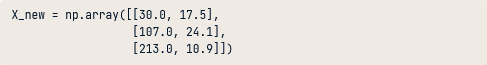


#### Instructions


- Create y_pred by predicting the target values of the unseen features X_new.
  
  
- Print the predicted labels for the set of predictions.


In [ ]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

### Train/test split + computing accuracy

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the .score() method.


#### Instructions


- Import train_test_split from sklearn.model_selection.
  
  
- Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
  
  
- Fit the knn model to the training data.
  
  
- Compute and print the model's accuracy for the test data.


In [ ]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

### Overfitting and underfitting

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.


#### Instructions


- Create neighbors as a numpy array of values from 1 up to and including 12.
  
  
- Instantiate a KNN classifier, with the number of neighbors equal to the neighbor iterator.
  
  
- Fit the model to the training data.
  
  
- Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the index of the train_accuracies and test_accuracies dictionaries, respectively.


In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors = neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

### Visualizing model complexity

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.


- Instructions


- Add a title "KNN: Varying Number of Neighbors".
  
  
- Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
  
  
- Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
  
  
- Display the plot.


In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

### Creating features

In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

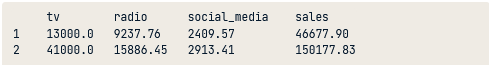

  
You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.


#### Instructions


- Create X, an array of the values from the sales_df DataFrame's "radio" column.
  
  
- Create y, an array of the values from the sales_df DataFrame's "sales" column.
  
  
- Reshape X into a two-dimensional NumPy array.
  
  
- Print the shape of X and y.


In [ ]:
import numpy as np

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

### Building a linear regression model

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

X and y have been preloaded for you as follows:

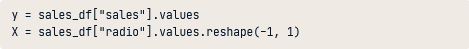

#### Instructions 

- Import LinearRegression.
  
  
- Instantiate a linear regression model.
  
  
- Predict sales values using X, storing as predictions.



In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

### Visualizing a linear regression model

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.


#### Instructions

- Import matplotlib.pyplot as plt.
 
    
- Create a scatter plot visualizing y against X, with observations in blue.
  
    
- Draw a red line plot displaying the predictions against X.
  
    
- Display the plot.


In [ ]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

### Fit and predict for regression

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows:

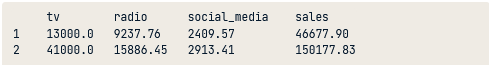


You will then use this model to predict sales based on the values of the test features.

LinearRegression and train_test_split have been preloaded for you from their respective modules.


#### Instructions


- Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
  
  
- Instantiate a linear regression model.
  
  
- Fit the model to the training data.
  
  
- Create y_pred, making predictions for sales using the test features.


In [ ]:
# Create X and y arrays
X = sales_df.drop("sales", axis = 1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

### Regression performance

Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.


#### Instructions


- Import mean_squared_error.
  
    
- Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
  
    
- Calculate the model's root mean squared error using y_test and y_pred.
  
    
- Print r_squared and rmse.


In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

### Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.


#### Instructions


- Import KFold and cross_val_score.
  
    
- Create kf by calling KFold(), setting the number of splits to six, shuffle to True, and setting a seed of 5.
  
    
- Perform cross-validation using reg on X and y, passing kf to cv.
  
    
- Print the cv_scores.


In [ ]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

### Analyzing cross-validation metrics

Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for cv_results, which has been preloaded for you from the previous exercise.

numpy has been imported for you as np.


#### Instructions


- Calculate and print the mean of the results.
  
    
- Calculate and print the standard deviation of cv_results.
  
    
- Display the 95% confidence interval for your results using np.quantile().


In [ ]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

## Regularized regression: Ridge

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their $R^{2}$

scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores. 

#### Instructions

- Import Ridge.

  
- Instantiate Ridge, setting alpha equal to alpha.

  
- Fit the model to the training data.


- Calculate the $R^{2}$ score for each iteration of ridge.

In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

### Lasso regression for feature importance

In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the sales_df data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as X and y, along with sales_columns, which contains the dataset's feature names.

#### Instructions

- Import Lasso from sklearn.linear_model.
    
    
- Instantiate a Lasso regressor with an alpha of 0.3.
  
  
- Fit the model to the data.
  
  
- Compute the model's coefficients, storing as lasso_coef

In [ ]:
 # Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

### Deciding on a primary metric

As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.


#### Answer the question


#### Possible Answers

- A model predicting the presence of cancer as the positive class.  ✔
  
    
- A classifier predicting the positive class of a computer program containing malware. ❌
    
  
- A model predicting if a customer is a high-value lead for a sales team with limited capacity. ❌
    

## Assessing a diabetes prediction classifier

In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

diabetes_df has been preloaded for you as a pandas DataFrame and split into X_train, X_test, y_train, and y_test. In addition, a KNeighborsClassifier() has been instantiated and assigned to knn.

You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.


#### Instructions

- Import confusion_matrix and classification_report.
  
  
- Fit the model to the training data.
  
  
- Predict the labels of the test set, storing the results as y_pred.
  
  
- Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.



In [ ]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Building a logistic regression model

In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The diabetes_df dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.


#### Instructions

- Import LogisticRegression.
  
    
- Instantiate a logistic regression model, logreg.
  
    
- Fit the model to the training data.
  
    
- Predict the probabilities of each individual in the test set having a diabetes diagnosis, storing the array of positive probabilities as y_pred_probs.


In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

### The ROC curve

Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, y_test, and the predicted probabilities of the test features belonging to the positive class, y_pred_probs, have been preloaded for you, along with matplotlib.pyplot as plt.

You will create a ROC curve and then interpret the results.

### Instructions 


- Import roc_curve.
  
    
- Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
  
    
- Plot true positive rate against false positive rate.



In [ ]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#### Question

Well done on producing the ROC curve for the diabetes prediction model.

But, what does the plot tell you about the model's performance?

##### Possible Answers

- The model is about as good as randomly guessing the class of each observation.  ❌
 
 
- The model is much worse than randomly guessing the class of each observation.    ❌
  
  
- The model is much better than randomly guessing the class of each observation.   ✔
  
  
- It is not possible to conclude whether the model performs better or worse than randomly guessing the class of each observation.  ❌

### ROC AUC

The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The confusion_matrix and classification_report functions have been preloaded for you, along with the logreg model you previously built, plus X_train, X_test, y_train, y_test. Also, the model's predicted test set labels are stored as y_pred, and probabilities of test set observations belonging to the positive class stored as y_pred_probs.

A knn model has also been created and the performance metrics printed in the console, so you can compare the roc_auc_score, confusion_matrix, and classification_report between the two models.


#### Instructions

- Import roc_auc_score.
  
    
- Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
  
    
- Calculate and print the confusion matrix.
  
    
- Call classification_report().


In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

### Hyperparameter tuning with GridSearchCV

Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

X_train, X_test, y_train, and y_test have been preloaded for you. A KFold() object has been created and stored for you as kf, along with a lasso regression model as lasso.


#### Instructions

- Import GridSearchCV.
 
    
- Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
  
    
- Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
  
    
- Fit the grid search object to the training data to perform a cross-validated grid search.


In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

### Hyperparameter tuning with RandomizedSearchCV

As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from diabetes_df have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "diabetes". A logistic regression model has been created and stored as logreg, as well as a KFold variable stored as kf.

You will define a range of hyperparameters and use RandomizedSearchCV, which has been imported from sklearn.model_selection, to look for optimal hyperparameters from these options.


#### Instructions


- Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.

        
- Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
  
    
- Fit logreg_cv to the training data.
  
    
- Print the model's best parameters and accuracy score.


In [ ]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

### Creating dummy variables

Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The music_df dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as pd.

Now you will create a new DataFrame containing the original columns of music_df plus dummy variables from the "genre" column.


#### Instructions


- Use a relevant function, passing the entire music_df DataFrame, to create music_dummies, dropping the first binary column.
  
    
- Print the shape of music_dummies.


In [ ]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first = True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

### Regression with categorical features

Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.

music_dummies has been preloaded for you, along with Ridge, cross_val_score, numpy as np, and a KFold object stored as kf.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value—"popularity".


#### Instructions


- Create X, containing all features in music_dummies, and y, consisting of the "popularity" column, respectively.
  
    
- Instantiate a ridge regression model, setting alpha equal to 0.2.
  
    
- Perform cross-validation on X and y using the ridge model, setting cv equal to kf, and using negative mean squared error as the scoring metric.
  
    
- Print the RMSE values by converting negative scores to positive and taking the square root.


In [ ]:
# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

### Dropping missing data

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.


#### Instructions 


- Print the number of missing values for each column in the music_df dataset, sorted in ascending order.


- Remove values for all columns with 50 or fewer missing values.


- Convert music_df["genre"] to values of 1 if the row contains "Rock", otherwise change the value to 0.



In [ ]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

### Pipeline for song genre prediction: I

Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified music_df dataset that you created in the previous exercise has been preloaded for you, along with KNeighborsClassifier and train_test_split.


#### Instructions


- Import SimpleImputer and Pipeline.
  
    
- Instantiate an imputer.
  
    
- Instantiate a KNN classifier with three neighbors.
  
    
- Create steps, a list of tuples containing the imputer variable you created, called "imputer", followed by the knn model you created, called "knn".



In [ ]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

### Pipeline for song genre prediction: II

Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

X_train, X_test, y_train, and y_test have been preloaded for you, and confusion_matrix has been imported from sklearn.metrics.


#### Instructions


- Create a pipeline using the steps you previously defined.
  
    
- Fit the pipeline to the training data.
  
    
- Make predictions on the test set.
  
    
- Calculate and print the confusion matrix.


In [ ]:
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

### Centering and scaling for regression

Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.

X_train, X_test, y_train, and y_test have been created from the music_df dataset, where the target is "loudness" and the features are all other columns in the dataset. Lasso and Pipeline have also been imported for you.

Note that "genre" has been converted to a binary feature where 1 indicates a rock song, and 0 represents other genres.


#### Instructions


- Import StandardScaler.
  
    
- Create the steps for the pipeline object, a StandardScaler object called "scaler", and a lasso model called "lasso" with alpha set to 0.5.
  
    
- Instantiate a pipeline with steps to scale and build a lasso regression model.
  
    
- Calculate the R-squared value on the test data.



In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

### Centering and scaling for classification

Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the music_df dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

StandardScaler, LogisticRegression, and GridSearchCV have all been imported for you.


#### Instructions


- Build the steps for the pipeline: a StandardScaler() object named "scaler", and a logistic regression model named "logreg".
  

- Create the parameters, searching 20 equally spaced float values ranging from 0.001 to 1.0 for the logistic regression model's C hyperparameter within the pipeline.
  
    
- Instantiate the grid search object.
  
    
- Fit the grid search object to the training data.


In [ ]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

### Visualizing regression model performance

Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: LinearRegression, Ridge, Lasso, cross_val_score, and KFold.

    
#### Instructions


- Write a for loop using model as the iterator, and model.values() as the iterable.
  
    
- Perform cross-validation on the training features and the training target array using the model, setting cv equal to the KFold object.
  
    
- Append the model's cross-validation scores to the results list.
  
    
- Create a box plot displaying the results, with the x-axis labels as the names of the models.


In [ ]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)
  
# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

### Predicting on the test set

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.

#### Instructions


- Import mean_squared_error.
  
    
- Fit the model to the scaled training features and the training labels.
  
    
- Make predictions using the scaled test features.
  
    
- Calculate RMSE by passing the test set labels and the predicted labels.


In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

### Visualizing classification model performance

In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as X_train_scaled, X_test_scaled, y_train, and y_test. Additionally, KNeighborsClassifier, DecisionTreeClassifier, and LogisticRegression have been imported.


#### Instructions


- Create a dictionary of "Logistic Regression", "KNN", and "Decision Tree Classifier", setting the dictionary's values to a call of each model.
  
    
- Loop through the values in models.
  
    
- Instantiate a KFold object to perform 6 splits, setting shuffle to True and random_state to 12.
  
    
- Perform cross-validation using the model, the scaled training features, the target training set, and setting cv equal to kf.


In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

### Pipeline for predicting song popularity

For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.


#### Instructions


- Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
 
    
- Create a pipeline object, and pass the steps variable.
  
    
- Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
  
    
- Print the best parameters and compute and print the test set accuracy score for the grid search object.


In [ ]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))